# Protein Secondary Structure Prediction
reference : https://www.ijcai.org/Proceedings/16/Papers/364.pdf

git : https://github.com/takatex/pytorch-protein-secondary-structure-prediction

In [1]:
import os, sys
sys.path.append('../src/')
import numpy as np
import glob
import pandas as pd

from model import Net
from data import *
from visualize import *
from utils import *

% matplotlib inline
% load_ext autoreload
% autoreload 2

## Data visualization

### data loader for data visualization

In [2]:
D = LoadDataset(batch_size_train=6048, batch_size_test=1)
idxs = np.arange(D.__len__())
data_loader, _ = D([idxs, idxs])

In [3]:
data, target, seq_len = next(iter(data_loader))
data, target, seq_len = data.data.numpy(), target.data.numpy(), seq_len.data.numpy()

### sequence length

max:700, min:12, mean:209


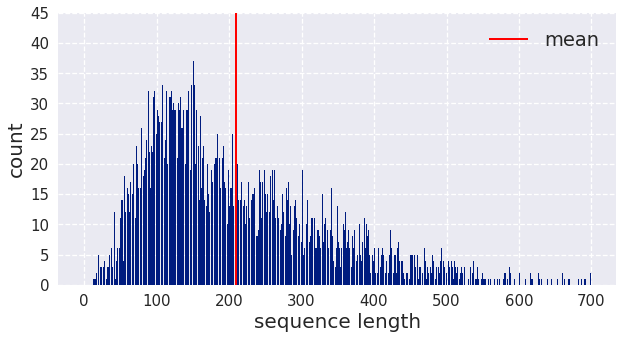

In [4]:
print(f'max:{seq_len.max()}, min:{seq_len.min()}, mean:{seq_len.mean().astype(int)}')
seq_len_plot(seq_len)

### rate of amino acid residues

In [5]:
amino_rate = np.zeros(8)
for t, l in zip(target, seq_len):
    t = t[:l]
    keys, values = amino_count(t)
    amino_rate[keys] += values
amino_rate /= seq_len.sum()

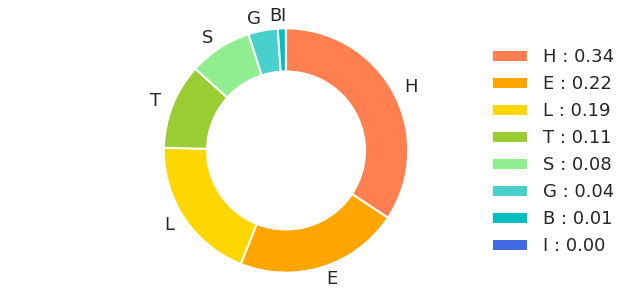

In [6]:
amino_rate_plot(amino_rate)

## Network

In [7]:
Net()

Net(
  (conv1): Sequential(
    (0): Conv1d(42, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv1d(42, 64, kernel_size=(7,), stride=(1,), padding=(3,))
    (1): ReLU()
  )
  (conv3): Sequential(
    (0): Conv1d(42, 64, kernel_size=(11,), stride=(1,), padding=(5,))
    (1): ReLU()
  )
  (brnn): GRU(192, 256, num_layers=3, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Sequential(
    (0): Linear(in_features=704, out_features=126, bias=True)
    (1): ReLU()
    (2): Linear(in_features=126, out_features=8, bias=True)
    (3): ReLU()
  )
)

## Result

### history plot

In [8]:
result_path = '../data/result_201808052028'
history_path = glob.glob(os.path.join(result_path, 'history*'))

# history : (train_loss, test_loss, acc)
history = np.array([np.load(h_path) for h_path in history_path])

history_0


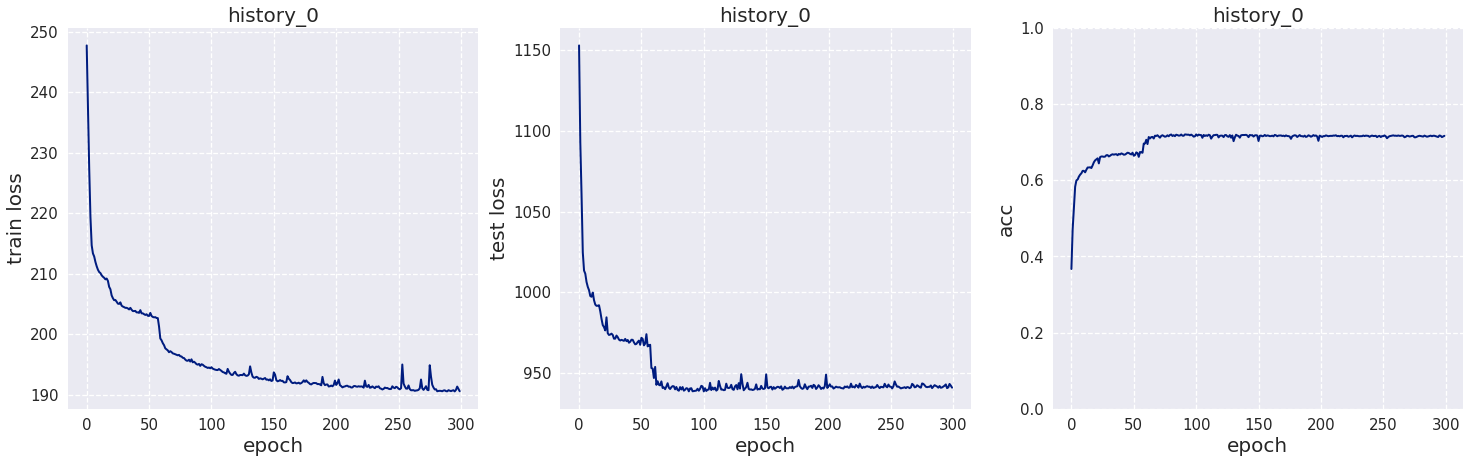

history_1


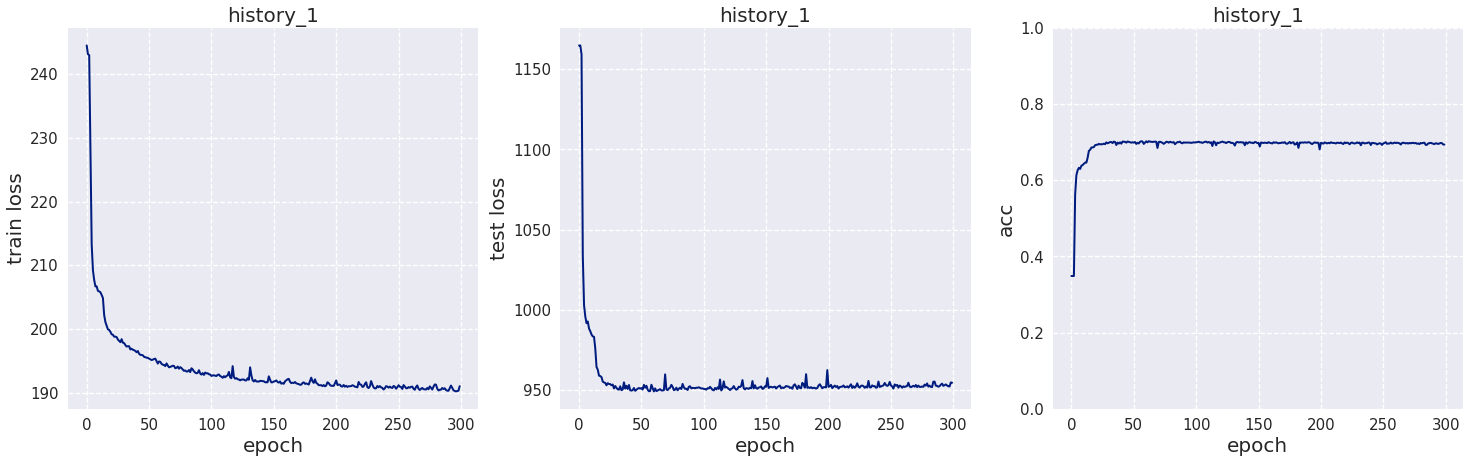

history_2


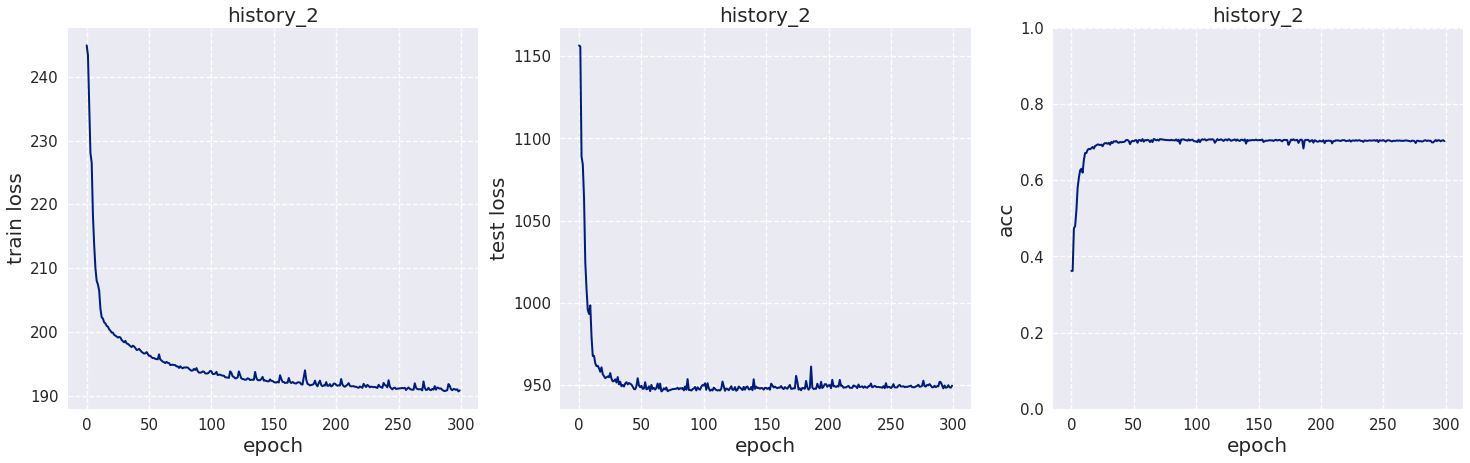

history_3


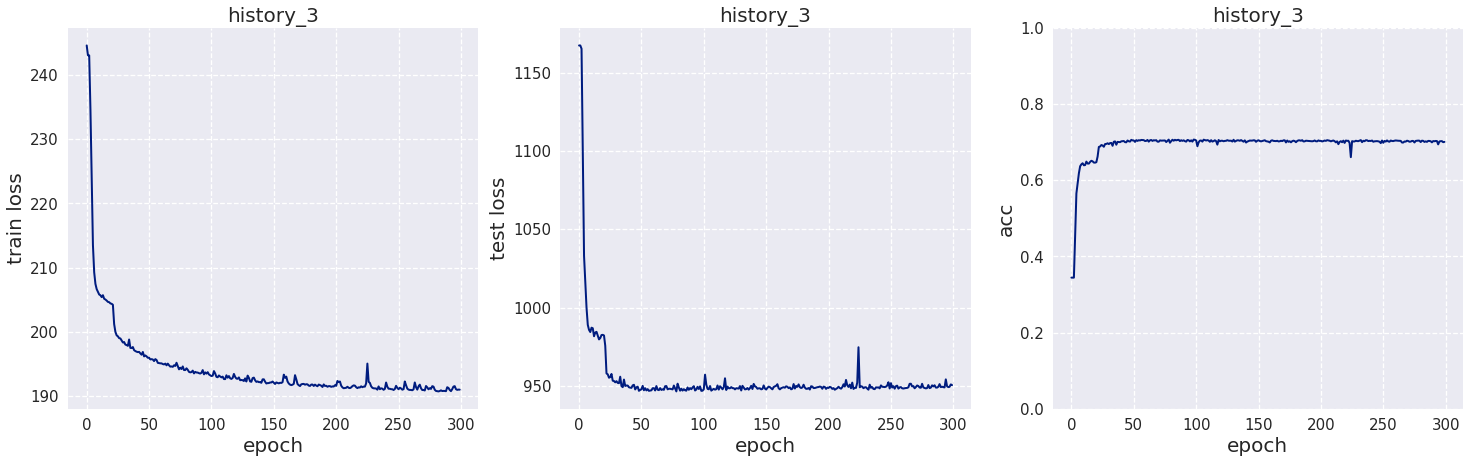

history_4


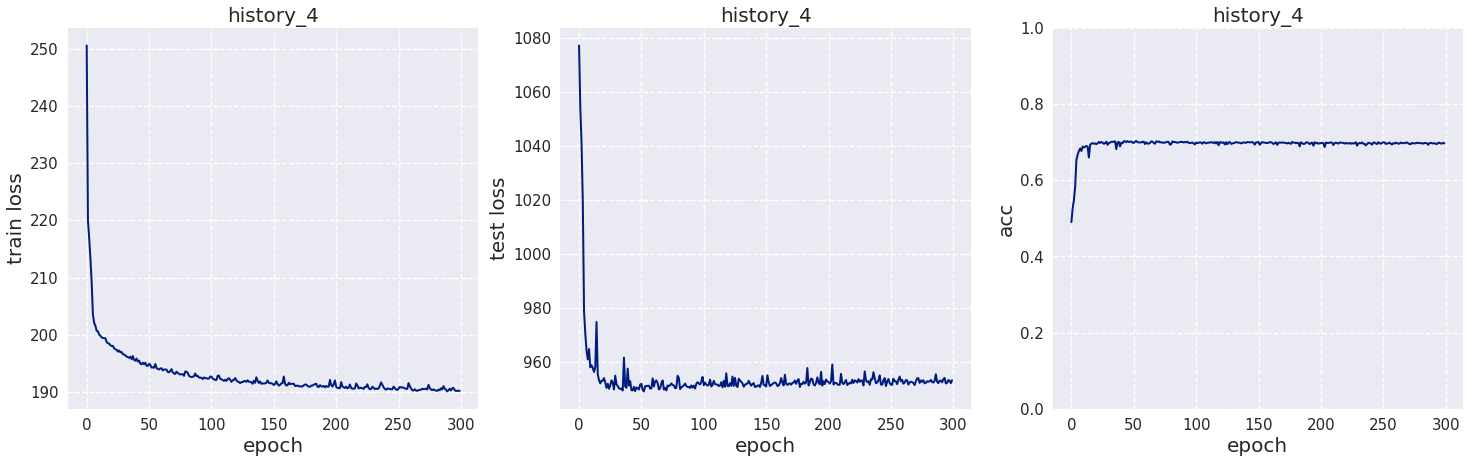

history_5


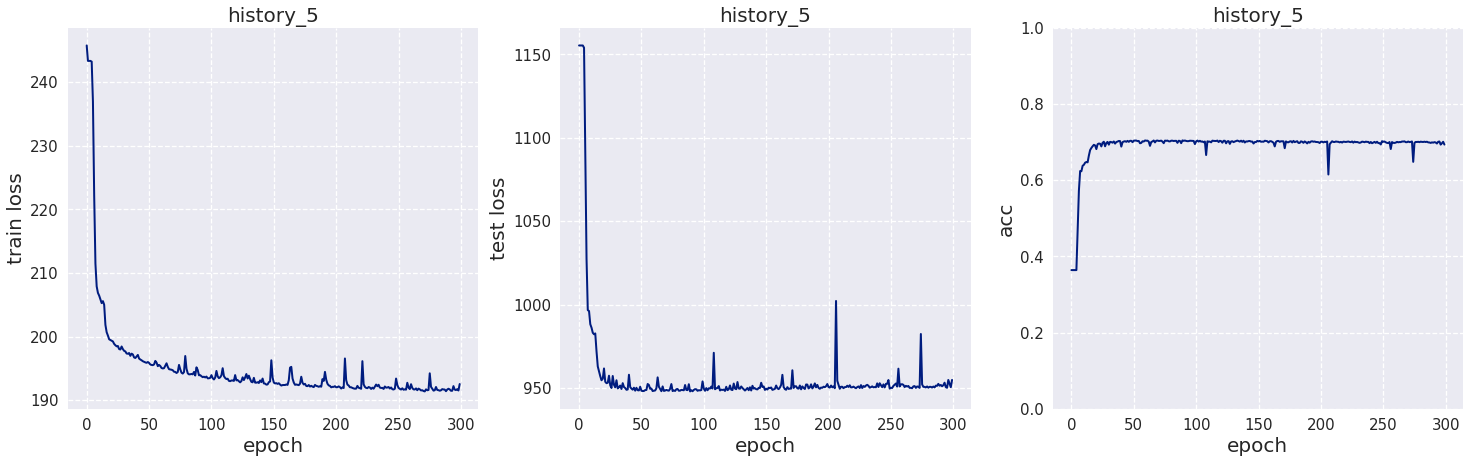

history_6


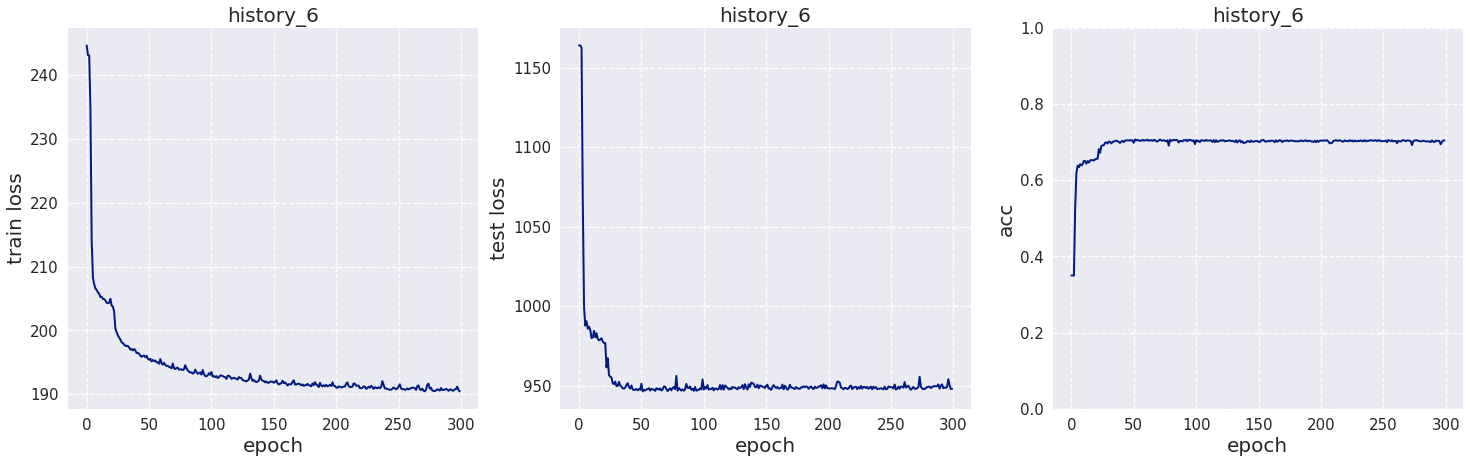

history_7


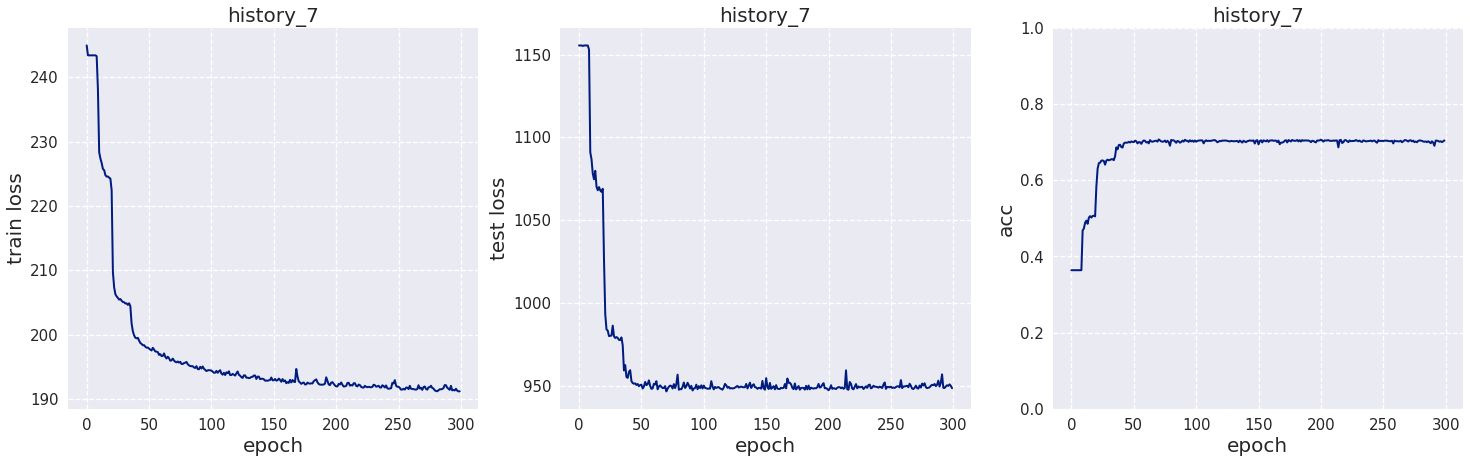

history_8


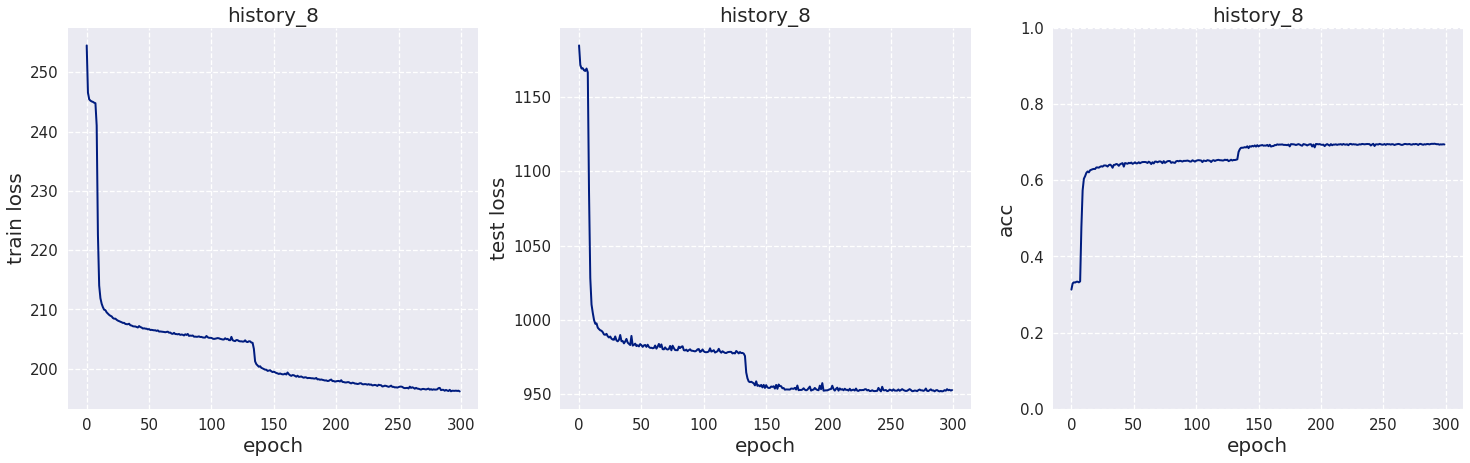

history_9


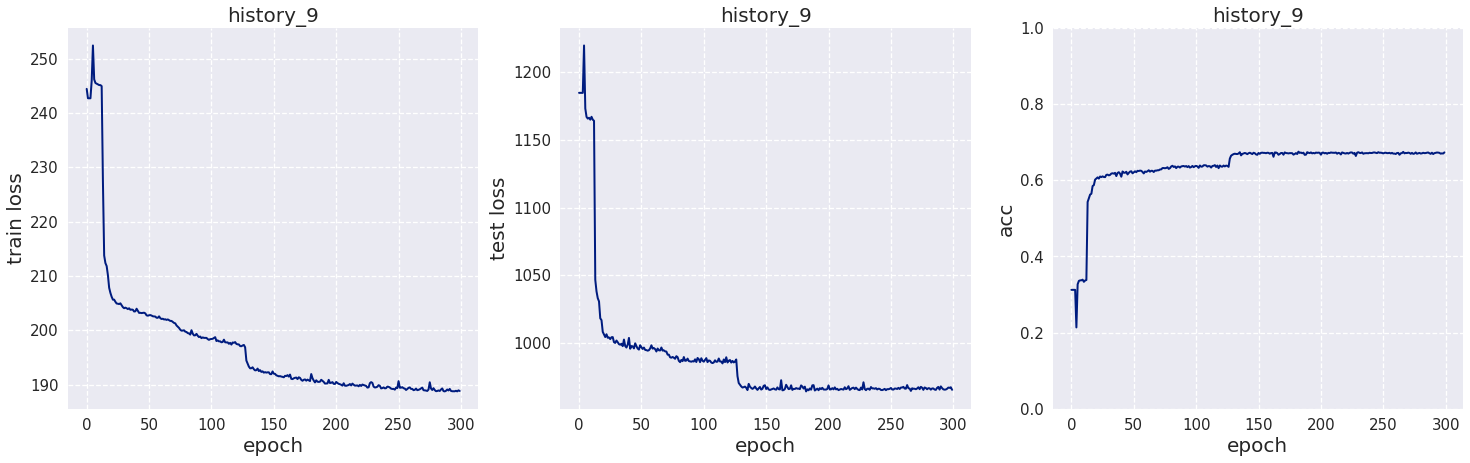

In [9]:
for h, h_path in zip(history, history_path):
    title, _ = os.path.basename(h_path).split('.')
    print(title)
    history_plot(h.T, title=title, show=True, save=False, save_path='')

### Accuracy

In [10]:
acc = np.array([max(h.T[2]) for h in history])
df_acc = pd.DataFrame({'acc' : acc,
                       'model' : 'CNN-BGRU'})

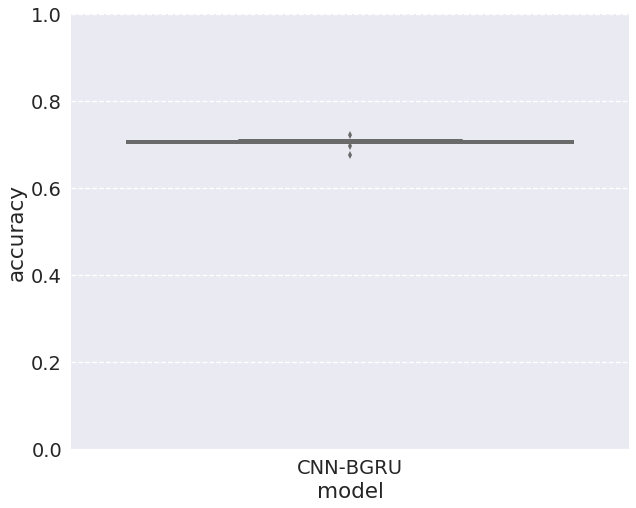

In [11]:
acc_plot(df_acc)

In [13]:
path = os.path.join(result_path, 'acid_acc.npy')
acc_each = np.load(path)
keys = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T']
df = pd.DataFrame({'acc' : acc_each.reshape(-1),
                   'amino_acid' : keys * 10})

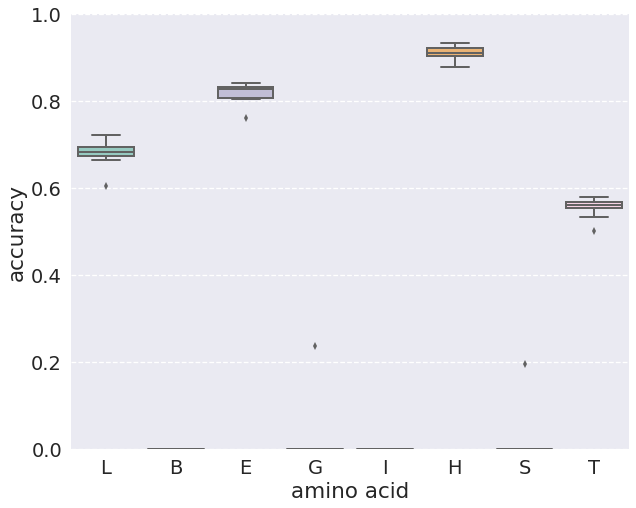

In [14]:
acc_each_plot(df)